### PROBLEM DESCRIPTION

This notebook demostrates a sequence classification of Fruit Lover Collection dataset by doing comparative Supervised Machine Learning Algorithms based classifier.

This dataset contains 2046 rows and 4 columns, Column names are Year, Months, States and GST,
in each column there are values as follows:
Years: July-2017 to Nov-2021  # 5 years data

Months: January to December # 12 months

States: 'Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chattisgarh', 'Madhya Pradesh', 'Gujrat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharastra',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman and Nicobar Island', 'Telangana',
       'Andhra Pradesh', 'Other Territory', 'CBIC', 'Ladakh'                # 39 states
       
GST : GST of State per Month

The problem is deciding whether a given GST Dataset of India. The data were collected by my self and that used 70-30 data for training and testing and get the accuracy.

Reff : https://pib.gov.in/indexd.aspx

Reff : https://www.gst.gov.in/download/gststatistics
____________________________________________________________________________________________________________________

##### Import modules

#### Let's start off with the basic step of importing all the relevant modules and functions required for this particular classifier.

In [1]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 291 kB/s            


In [2]:
import pandas as pd # load dataframe
from pandas import set_option # to precise decimal value
import numpy as np # for mumeric operations
import matplotlib.pyplot as plt # for graphs
import seaborn as sns  # for correlation plots
import warnings # to ignore warnings
warnings.filterwarnings('ignore')
import openpyxl

#### Firstly, let's learn about our dataset. For this we need to import the data and convert it into a Pandas' dataframe.

In [3]:
df = pd.read_excel("../input/indian-gst-dataset-jul2017-nov2021/Indian_GST_Dataset_with_months_and_state_2017-2021_Nov.xlsx") # load excel dataset
df.head() # top 5 rows

,Years,Months,States,GST
0,2017,July,Jammu and Kashmir,0.000126
1,2017,July,Himachal Pradesh,0.174947
2,2017,July,Punjab,2.723252
3,2017,July,Chandigarh,0.374057
4,2017,July,Uttarakhand,0.185385


In [4]:
df.shape # count Rows and columns

(2046, 4)

In [5]:
df.columns # column names

Index(['Years', 'Months', 'States', 'GST'], dtype='object')

In [6]:
df.Years.unique() # unique year name

array([2017, 2018, 2019, 2020, 2021])

In [7]:
df.Months.unique() #unique values

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [8]:
df.States.unique() #unique values

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chattisgarh', 'Madhya Pradesh', 'Gujrat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharastra',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman and Nicobar Island', 'Telangana',
       'Andhra Pradesh', 'Other Territory', 'CBIC', 'Ladakh'],
      dtype=object)

In [9]:
df.nunique() # unique value count

Years        5
Months      12
States      39
GST       2024
dtype: int64

#### Replacing months with numbers

In [10]:
# changing string to int
df['Months'].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
                'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12,}, inplace=True)
df.head()

,Years,Months,States,GST
0,2017,7,Jammu and Kashmir,0.000126
1,2017,7,Himachal Pradesh,0.174947
2,2017,7,Punjab,2.723252
3,2017,7,Chandigarh,0.374057
4,2017,7,Uttarakhand,0.185385


#### Total entries in a year

In [11]:
print(df.groupby('Years').size())  # size of unique values

Years
2017    228
2018    456
2019    465
2020    468
2021    429
dtype: int64


#### The data can be visualized by using features of matplotlib & Seaborn library. By doing so, we can get the following results.

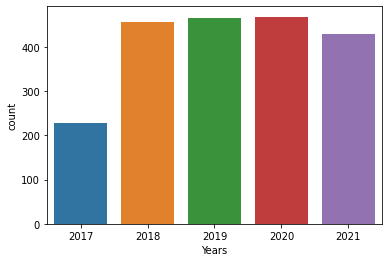

In [12]:
# count plot
sns.countplot(df['Years'],label='Count') # count plot
plt.show()

#### Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values.

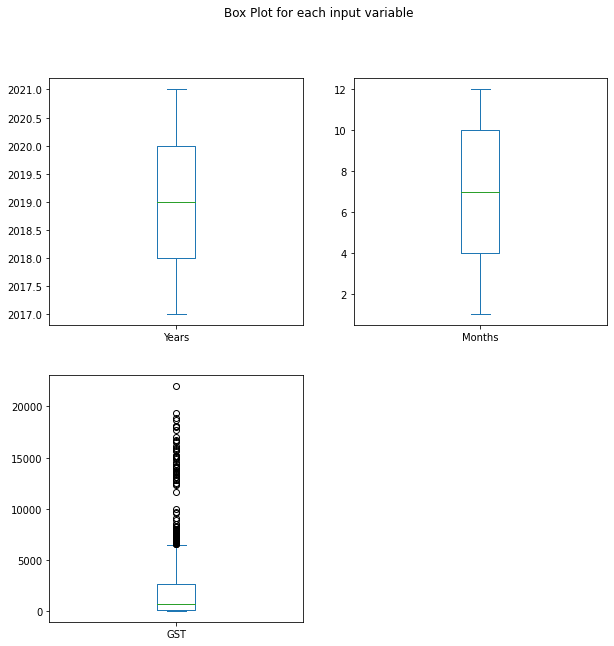

In [13]:
#box plot
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
# plt.savefig('GST_box')
plt.show()

#### Histogram is used to summarize discrete or continuous data that are measured on an interval scale.

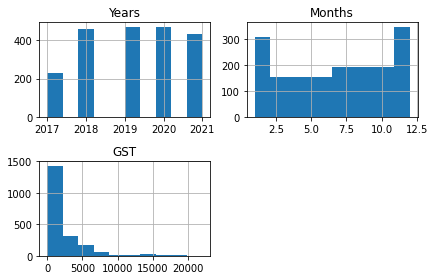

In [14]:
# histogram
df.hist()
plt.tight_layout()
# plt.savefig('gst_hist')  # to save graph image as png

#### Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

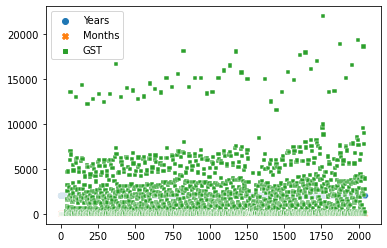

In [15]:
sns.scatterplot(data=df)
plt.show()

#### Set_option is used to precise 2 decimal values. 
#### The describe() method computes and displays summary statistics for a Python dataframe

In [16]:
set_option('precision',2)
df.describe() # only number columns # statistical data

,Years,Months,GST
count,2046.0,2046.00,2046.00
mean,2019.2,6.74,1920.12
std,1.3,3.39,2901.01
min,2017.0,1.00,0.00
25%,2018.0,4.00,91.42
50%,2019.0,7.00,688.15
75%,2020.0,10.00,2645.43
max,2021.0,12.00,22012.63


#### Data Preparation and scalling.

In [17]:
#preparing data with scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_names = ['GST','Months']
x=df[feature_names]
y=df['Years']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

# print(x_train[:3]) # to check output

scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# print("\nAfter scaling\n")
# print(x_train[:3]) # to check output


## 1. Logistic Regresion
#### Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results.

In [18]:
from sklearn.linear_model import LogisticRegression   # machine learning lib/model

#logistic regression
logreg = LogisticRegression()  # machine learning algorithm
logreg.fit(x_train, y_train)

#print score of train data
print('Accuracy of Logistic regression classifier on training set:{:.2f}'
     .format(logreg.score(x_train, y_train)))

#print score of test data
print('Accuracy of Logistic regression classifier on test set:{:.2f}'
     .format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set:0.25
Accuracy of Logistic regression classifier on test set:0.21


## 2. Decission Tree
#### A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.

In [19]:
from sklearn.tree import DecisionTreeClassifier

# decission tree
clf = DecisionTreeClassifier().fit(x_train, y_train)

#print score of train data
print('Accuracy of Decision Tree classifier on training set:{:.2f}'
      .format(clf.score(x_train, y_train)))

#print score of test data
print('Accuracy of Decision Tree Classifier on test set:{:.2f}'
      .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set:1.00
Accuracy of Decision Tree Classifier on test set:0.24


## 3. KNN ( K- Nearest Neighbors)
#### KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# KNN method
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

#print score of train data
print('Accuracy of KNN classifier on training set:{:.2f}'
     .format(knn.score(x_train, y_train)))

#print score of test data
print('Accuracy of KNN Classifier on test set:{:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of KNN classifier on training set:0.44
Accuracy of KNN Classifier on test set:0.18


## 4. Gaussian Naive Bayes Classifiers
#### Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality.

In [21]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive bayes 
gnb = GaussianNB()
gnb.fit(x_train, y_train)

#print score of train data
print('Accuracy of GNB classifier on training set:{:.2f}'
     .format(gnb.score(x_train, y_train)))

#print score of test data
print('Accuracy of GNB Classifier on test set:{:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set:0.25
Accuracy of GNB Classifier on test set:0.22


## 5. Support Vector Machine (SVM) Classifier
#### Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. ... Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In [22]:
from sklearn.svm import SVC

# SVM classifier
svm = SVC()
svm.fit(x_train, y_train)

#print score of train data
print('Accuracy of SVM classifier on training set:{:.2f}'
     .format(svm.score(x_train, y_train)))

#print score of test data
print('Accuracy of SVM Classifier on test set:{:.2f}'
     .format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set:0.25
Accuracy of SVM Classifier on test set:0.21


In [23]:
data = {'Training Accuracy (in %)':[25,100,44,25,25],'Testing Accuracy (in %)':[21,24,18,22,21]}  
   
df = pd.DataFrame(data, index =['Logistic Regression','Decision Tree','K-Nearest Neighbour (KNN)','Gaussian Naive Bayes','Support Vector Machine (SVM)'])  
  
df

,Training Accuracy (in %),Testing Accuracy (in %)
Logistic Regression,25,21
Decision Tree,100,24
K-Nearest Neighbour (KNN),44,18
Gaussian Naive Bayes,25,22
Support Vector Machine (SVM),25,21
